# Energy consumption in France based on RTE data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

## Load data

In [2]:
# Use local repository
raw_data = pd.read_csv('../data/consommation-quotidienne-brute.csv', sep=';')

In [3]:
raw_data.head()

,Date - Heure,Date,Heure,Consommation brute gaz (MW PCS 0°C) - GRTgaz,Statut - GRTgaz,Consommation brute gaz (MW PCS 0°C) - Teréga,Statut - Teréga,Consommation brute gaz totale (MW PCS 0°C),Consommation brute électricité (MW) - RTE,Statut - RTE,Consommation brute totale (MW)
0,2012-01-01T15:00:00+01:00,01/01/2012,15:00,57452.0,Définitif,3278.0,Définitif,60730.0,49147.0,Définitif,109877.0
1,2012-01-01T19:30:00+01:00,01/01/2012,19:30,NaN,NaN,NaN,NaN,NaN,57785.0,Définitif,NaN
2,2012-01-21T04:00:00+01:00,21/01/2012,04:00,65109.0,Définitif,4339.0,Définitif,69448.0,55566.0,Définitif,125014.0
3,2012-01-28T14:00:00+01:00,28/01/2012,14:00,82284.0,Définitif,6138.0,Définitif,88422.0,66847.0,Définitif,155269.0
4,2012-01-28T18:30:00+01:00,28/01/2012,18:30,NaN,NaN,NaN,NaN,NaN,70498.0,Définitif,NaN


In [22]:
# raw timevector
data_RTE = raw_data[:][['Date - Heure', 'Consommation brute électricité (MW) - RTE', 'Statut - RTE' ]]

# clear time duplicated values
data_RTE.drop_duplicates('Date - Heure', keep='first', inplace=True)

In [23]:
## clear nan values
#data_ARA.dropna(inplace=True)

# Define time-index
data_RTE.set_index(pd.DatetimeIndex(pd.to_datetime(data_RTE['Date - Heure'], utc=True)), inplace=True)
data_RTE.drop('Date - Heure', axis=1, inplace=True)

# sort index in dataframe
data_RTE.sort_index(inplace=True)

In [100]:
# daily energy
data_RTE_dE = data_RTE[data_RTE.index.year == 2020].resample('D').sum().div(2) 
# calculate the moving average
data_RTE_dE['Conso moyenne glissante [MW]'] = data_RTE_dE['Consommation brute électricité (MW) - RTE'].rolling(7, center=True).mean()

# monthly energy
data_RTE_mE = data_RTE[data_RTE.index.year == 2013].resample('M').sum().div(2) 

<b>Check rolling mean for one year of data</b>

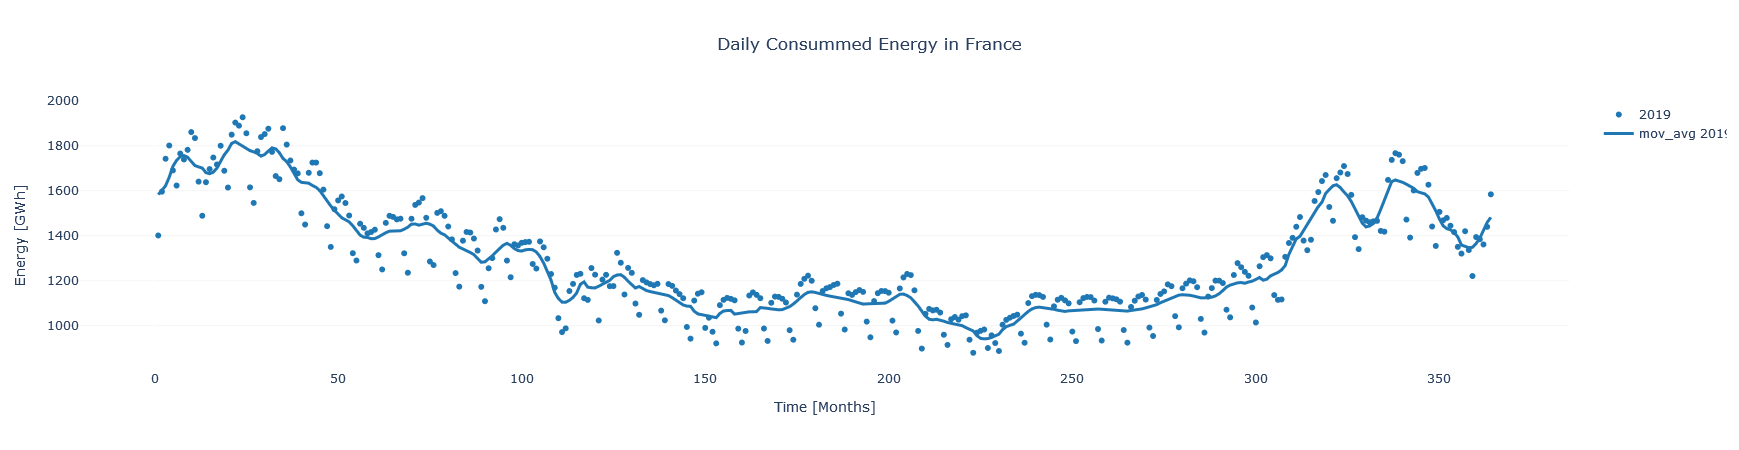

In [111]:
# display daily energy overtime

# define graph options
init_year = 2019

fig = plotly.graph_objs.Figure()
#color_list = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
color_list = plotly.colors.DEFAULT_PLOTLY_COLORS 

# process data
df_daily = data_RTE.resample('D').sum().div(2) # calculate the energy integral per day (timestep half-hour)
df_daily['mov_avg'] = data_RTE['Consommation brute électricité (MW) - RTE'].resample('D').sum().div(2).rolling(7, center=True).mean()

# plot graph
for n, year in enumerate(range(init_year, init_year+1)):
    df_plot = df_daily[df_daily.index.year == year]
       
    fig.add_trace(
        plotly.graph_objs.Scatter(
            mode = 'markers',
            x = np.arange(1, len(df_plot.index)),
            y = df_plot['Consommation brute électricité (MW) - RTE'] / 1000, # GWh
            name = year,
            marker = dict(color = color_list[n])
            )
    )
    
    fig.add_trace(
        plotly.graph_objs.Scatter(
            x = np.arange(1, len(df_plot.index)),
            y = df_plot['mov_avg']  / 1000, # GWh
            name = 'mov_avg %i' %(year),
            line = dict(width = 3, color = color_list[n])
            )
    )

fig.update_layout(
    plot_bgcolor='white', 
    xaxis_title = 'Time [Months]',
    yaxis_title = 'Energy [GWh]',
    title = 'Daily Consummed Energy in France',
    title_x = .5
    )
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')

<b>Energy consumption in France for the last eight years</b>

Display the energy as the moving average with a week window per daily energy cumulated

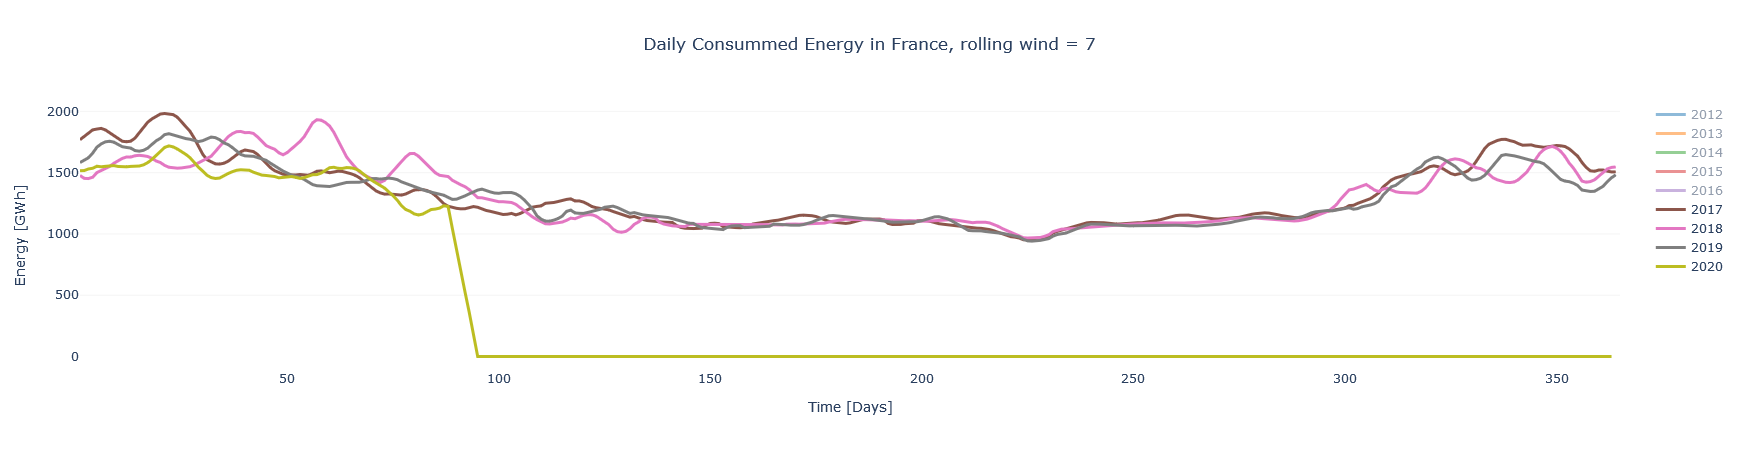

In [113]:
# define graph options
init_year = 2012

fig = plotly.graph_objs.Figure()
#color_list = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
color_list = plotly.colors.DEFAULT_PLOTLY_COLORS 

# process data
df_daily = data_RTE.resample('D').sum().div(2) # calculate the energy integral per day (timestep half-hour)
df_daily['mov_avg'] = data_RTE['Consommation brute électricité (MW) - RTE'].resample('D').sum().div(2).rolling(7, center=True).mean()

# plot graph
for n, year in enumerate(range(init_year, df_daily.index.year.max()+1)):
    df_plot = df_daily[df_daily.index.year == year]
    
    fig.add_trace(
        plotly.graph_objs.Scatter(
            x = np.arange(1, len(df_plot.index)),
            y = df_plot['mov_avg'] / 1000, # GWh
            name = year,
            line = dict(width = 3, color = color_list[n])
            )
    )

fig.update_layout(
    plot_bgcolor='white', 
    xaxis_title = 'Time [Days]',
    yaxis_title = 'Energy [GWh]',
    title = 'Daily Consummed Energy in France, rolling wind = 7',
    title_x = .5
    )
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')